# Regresión Lineal: Coste de un incidente de Seguridad
En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

-----> Ejercicio realizado con una base de datos creada de manera artesanal.
-----> Implementacion practica de algoritmo de regrecion lineal con el FRAMEWORK SCIKIT-LEARN

## Enunciado del ejercicio
El ejercicio consiste en predecir el costo de un incidente de seguridad con base al número de equipos que se han visto afectados. El conjunto de datos es gererado de manera aleatoria.



# Ejercicio

## Generacion del conjunto de datos.

In [3]:
import numpy as np

# Inicialización del array con valores aleatorios
# Número de valores (z) , vertical (y) , horizontal (x)
# X corresponde al número de equipos afectados
X = 2 * np.random.randn(100, 1)
# y corresponde al coste de los incidentes
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del conjunto de datos es: ", len(X))
X

La longitud del conjunto de datos es:  100


array([[ 1.49446964],
       [ 1.98505363],
       [-0.25386058],
       [ 0.13163049],
       [ 0.92378926],
       [ 1.27033993],
       [-5.57553858],
       [ 3.07215427],
       [-1.09654926],
       [-1.04525812],
       [-3.86903494],
       [-0.41575023],
       [-3.39094157],
       [ 2.51353864],
       [-1.07576409],
       [ 1.09527137],
       [ 1.47784872],
       [ 1.22364361],
       [-1.57309128],
       [ 0.21838031],
       [-2.16594414],
       [ 1.86292943],
       [ 1.98130151],
       [-1.8816426 ],
       [ 0.84501931],
       [-2.52579303],
       [-3.29231573],
       [ 0.8558165 ],
       [-1.7258124 ],
       [ 0.44491887],
       [ 1.73832085],
       [ 2.5966382 ],
       [-2.37619003],
       [ 1.02794545],
       [-0.54258081],
       [ 0.10249537],
       [-2.27715233],
       [ 1.19623968],
       [-2.28885503],
       [-0.54057529],
       [ 2.1795619 ],
       [ 4.01998694],
       [-0.70197225],
       [-0.10261343],
       [ 0.60336573],
       [-4

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

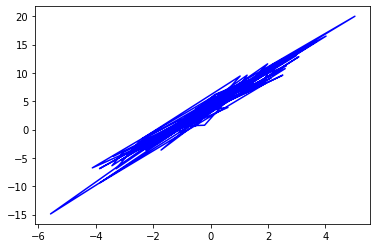

In [6]:
#b es del color
plt.plot(X, y, "b-")
plt.show()

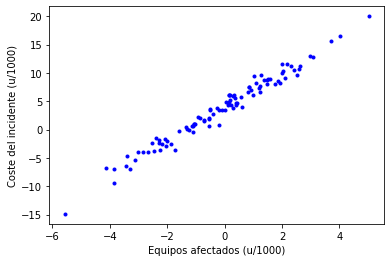

In [7]:
#b. es el color y la forma en la que se representaran los datos ".","-","--","x","o","p"...etc
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/1000)")
plt.show()

## Modificacion del conjunto de datos

In [8]:
import pandas as pd

In [51]:
#Creamos un diccionario con los datos que corresponderan a equipos y coste.
#El data frame es lineal por eso se una flatten.... equipos es "x" y coste es la etiqueta de salida
#             CLAVE             VALOR
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()}
#Asignamos BD a un DataFrame de Pandas.
df = pd.DataFrame(data)
#Mostrar cabecera de elementos
df.head(10)

,n_equipos_afectados,coste
0,-1.508820,-0.419427
1,-3.770632,-6.744354
2,-2.836275,-2.843138
3,0.667582,6.451826
4,0.353796,6.078555
5,2.528919,12.238539
6,1.117355,7.223433
7,-0.744986,1.818921
8,1.162794,6.214069
9,-0.879867,1.947981


In [26]:
#Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
#Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
#df queda como el data frame de equipos y coste
df.head(1000)


,n_equipos_afectados,coste
0,1584,95847
1,3586,138518
2,-2607,-23392
3,-1963,-34081
4,-369,27838
...,...,...
95,1568,82040
96,-154,31465
97,-1402,-9266
98,240,60221


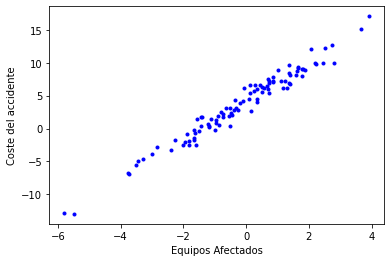

In [52]:
#Representacion gráfica del conjunto de datos
#                 Eje X                Eje Y
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Coste del accidente")
plt.show()


## Construcción del Modelo

In [53]:
# Aqui es donde se entrena
from sklearn.linear_model import LinearRegression

In [86]:
# Construcción del modelo y ajuste de la función hipótesis
# Instanciamos el objeto (instanceamos el algoritmo)
lin_reg = LinearRegression()
# Resive las... VARIABLES DE ENTRADA                       VARIABLES DE SALIDA
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1,1), df['coste'].values)

LinearRegression()

In [87]:
# Parámetro theta 0  =  bias
# Va a cortar en el eje vertical en 4.18
lin_reg.intercept_

4.185813735421704

In [88]:
# Parametro theta 1  =  X's
# Si tuvieramos más datos en x aparecerian en el array por cada tipo valor de entrada
lin_reg.coef_

array([2.90644825])

In [89]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
# Esto se hace con el objetivo de reprentar graficamente el modelo (limite de decisión)
X_min_max = np.array([[df['n_equipos_afectados'].min()], [df['n_equipos_afectados'].max()]])
y_train_pred = lin_reg.predict(X_min_max)

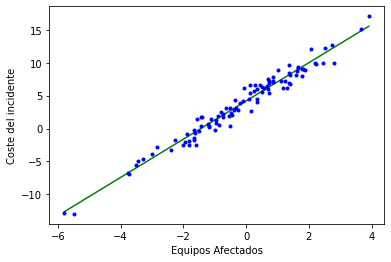

In [90]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred,"g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Coste del incidente")
plt.show()

## Predicción de nuevos ejemplos

In [91]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new) 

print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 3782 €


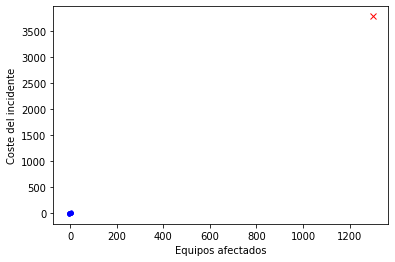

In [93]:
plt.plot(X_min_max, y_train_pred,"g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()